# The linear congruent method is written as
## $ r_{n+1} = (ar_n + b) \ mod \ c $ 
### This pseudo-random number generator takes a "seed" $r_0$ and generates a series of numbers which, depending on the choices of a, b, and c, can meet the necessary criteria for Monte Carlo techniques.

### Creating a function for LCG and the LCG seed $ r_0 $

In [1]:
def seedLCG(init):
    global r_naught # declaring the random seed as global so we can use it in our lcg function
    r_naught = init
    global r
    r = init
    

def LCG(a, b, c, iters):
    LCG = [r]
    global r_naught
    for i in range(iters):
        r_naught = (a*r_naught + b) % c
        LCG.append(r_naught)
    return LCG

### Testing if our function works by following the given values of Example 1 (a = 5, b = 3, c = 8, r0 = 1)

This will give us the values of 0,3,2,5,4,7,6, and 1. Before repeating the values again

In [2]:
seedLCG(1)

In [3]:
LCG(5,3,8,10)

### Take note that the sequence repeats after the 8th term 

## For pedagogical purposes, try the unwise choice: (a, b, c, r0 ) = (57, 1, 256, 10)

In [4]:
seedLCG(10)
unwise_choice = LCG(57,1,256, 260)
print(unwise_choice)

### We can see that the repeated value is on the 257th term. We must now remove all the repeated elements in our list to have a non-repeating list.

In [5]:
nonrepeatedLCG = [] 
for i in unwise_choice: 
    if i not in nonrepeatedLCG: 
        nonrepeatedLCG.append(i) 

In [6]:
print(nonrepeatedLCG)

### We have now removed the repeated values of our LCG function. To determine the periodicity, we determine the length of our list.

In [7]:
len(nonrepeatedLCG)

### The periodicity is 256, which corresponds to our modulus c.

# Plotting successive pairs $ (X_i , Y_i) = (r_{2i-1} , r_{2i}) , i = 1, 2, ...$

In [8]:
x = nonrepeatedLCG[:len(nonrepeatedLCG)-1]
y = nonrepeatedLCG[1:len(nonrepeatedLCG)]

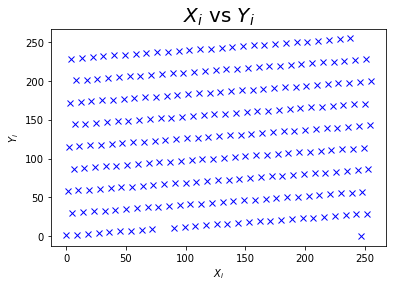

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title('$ X_i $ vs $Y_i$',fontsize=20)
ax.set_xlabel('$X_i$')
ax.set_ylabel('$Y_i$')
plt.plot(x, y, 'x', color='blue')

# $r_i$ vs. $i$ plot

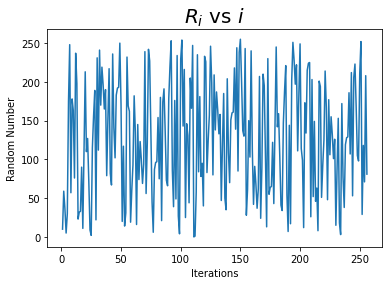

In [10]:
import numpy as np
iters = np.linspace(1,256, 256)

fig, ax = plt.subplots()
ax.set_title('$ R_i $ vs $i$',fontsize=20)
ax.set_xlabel('Iterations')
ax.set_ylabel('Random Number')
plt.plot(iters, nonrepeatedLCG)

# Test the built-in random-number generator on your computer for correlations

In [11]:
import random
rng = []
for i in range(256):
    rng.append(random.randint(1,256))
rngdense = []
for i in range(1500):
    rngdense.append(random.randint(1,256))

In [12]:
print(rng)

[31, 156, 63, 176, 148, 136, 48, 224, 8, 94, 83, 238, 68, 88, 81, 1, 102, 25, 66, 29, 212, 148, 169, 154, 96, 224, 224, 122, 2, 256, 130, 74, 216, 64, 245, 252, 61, 203, 224, 60, 34, 237, 29, 230, 146, 225, 146, 129, 216, 87, 202, 138, 41, 172, 88, 200, 220, 41, 229, 130, 143, 92, 252, 3, 17, 138, 153, 49, 7, 47, 222, 49, 1, 161, 13, 126, 101, 207, 51, 20, 183, 170, 92, 167, 236, 182, 84, 21, 187, 108, 133, 236, 187, 197, 247, 3, 152, 110, 117, 167, 120, 28, 248, 153, 136, 245, 144, 109, 10, 73, 11, 16, 194, 207, 8, 76, 219, 76, 131, 87, 1, 126, 101, 65, 81, 122, 215, 146, 63, 214, 149, 64, 241, 218, 37, 98, 70, 165, 252, 144, 96, 110, 43, 135, 250, 250, 131, 57, 136, 37, 59, 119, 34, 163, 80, 14, 204, 181, 255, 152, 248, 70, 177, 190, 229, 145, 229, 241, 193, 151, 58, 238, 219, 217, 23, 188, 215, 91, 214, 16, 18, 213, 165, 101, 63, 227, 131, 17, 13, 231, 135, 34, 231, 163, 201, 140, 77, 181, 149, 42, 199, 185, 42, 132, 54, 179, 9, 98, 59, 231, 146, 137, 29, 2, 202, 110, 147, 244, 247,

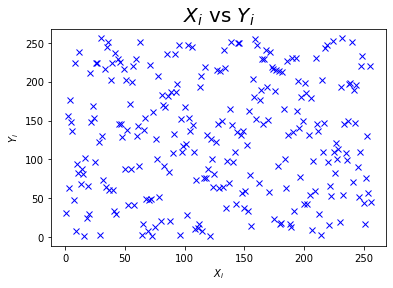

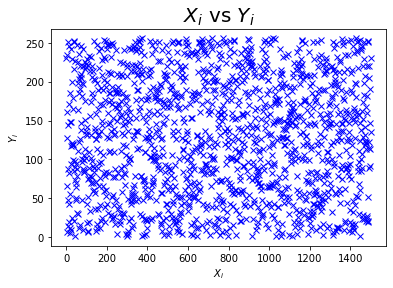

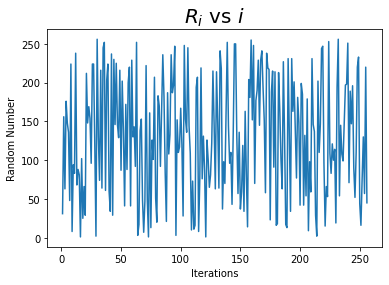

In [14]:
iters = np.linspace(1, 256, 256)
itersdense = np.linspace(1, 1500, 1500)

fig, ax = plt.subplots()

ax.set_title('$ X_i $ vs $Y_i$',fontsize=20)
ax.set_xlabel('$X_i$')
ax.set_ylabel('$Y_i$')
plt.plot( iters, rng, 'x', color='blue')

fig, ax = plt.subplots()

ax.set_title('$ X_i $ vs $Y_i$',fontsize=20)
ax.set_xlabel('$X_i$')
ax.set_ylabel('$Y_i$')
plt.plot( itersdense, rngdense, 'x', color='blue')


fig, ax = plt.subplots()

ax.set_title('$ R_i $ vs $i$',fontsize=20)
ax.set_xlabel('Iterations')
ax.set_ylabel('Random Number')
plt.plot(iters, rng)


## We can now see that the $X_i$ vs. $Y_i$ plot is more randomly spread out compared to the plot generated by our LCG function.